## Import the Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and preprocessing

In [14]:

# loading data using pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [15]:
#print frist 5 rows
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
#print last 5 rows
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [17]:
# Number of Rows and Columns
gold_data.shape

(2290, 6)

In [18]:
#Getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [19]:
# Check the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [20]:
# Getting some Statisticall information of The data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. posative correlation
2. negative correlation





In [21]:
correlation = gold_data.corr()

<ipython-input-21-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

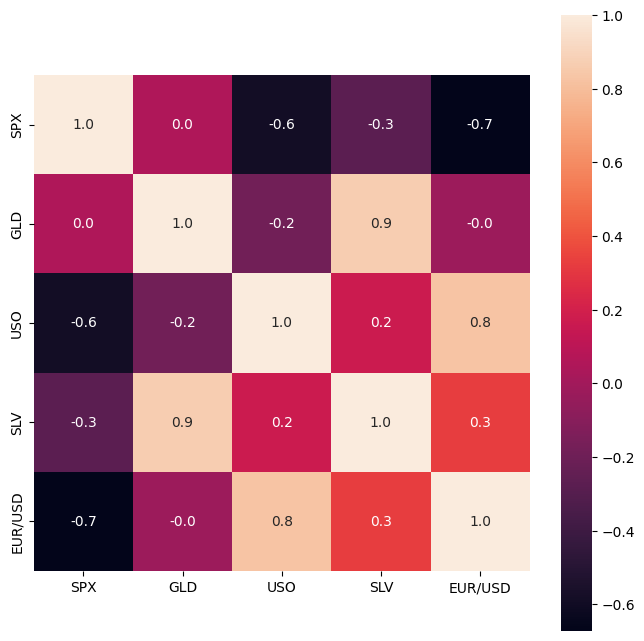

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 10})

In [23]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-24-f9dbd5ad6a0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color ='green')


<Axes: xlabel='GLD', ylabel='Density'>

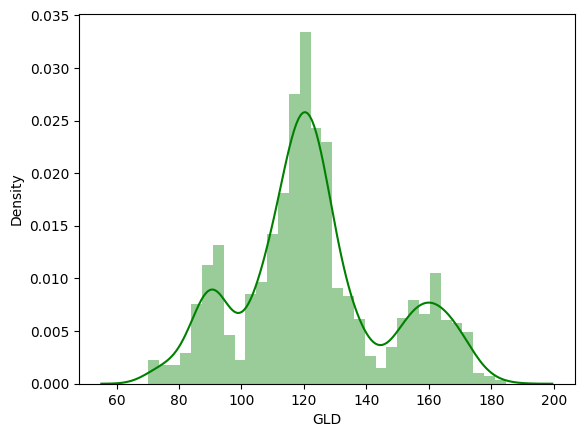

In [24]:
#Cheacking the Distribution of the GLD price
sns.distplot(gold_data['GLD'], color ='green')

#Splitting Data and Taking Target

In [25]:
X = gold_data.drop(['GLD','Date'], axis =1)
Y = gold_data['GLD']

In [26]:
print(X.head(5))
print(Y.head(5))

           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099
0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64


# Splitting data into trainig and testing

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size= 0.2 , random_state=2)

# Model Training : Random Forest Regressor

In [28]:
Regressor = RandomForestRegressor(n_estimators=100)

In [29]:
Regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [30]:
predicted_data = Regressor.predict(X_test)

In [ ]:
print(predicted_data)

In [34]:
# R Squred Erorr
error_scrore = metrics.r2_score(Y_test, predicted_data)
print("The R Squre Error is {}".format(error_scrore))

The R Squre Error is 0.9891367186003817


In [33]:
error_scrore

0.9891367186003817

# Visulization of Actual Values and The predicted Values


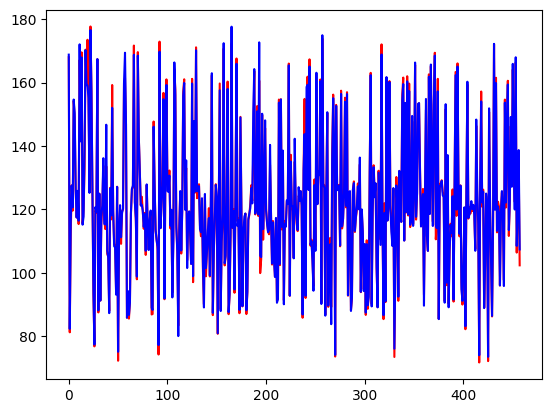

In [42]:
Y_test =  list(Y_test)
plt.plot(Y_test, color= 'red', label = 'Actual Values')
plt.plot(predicted_data, color= 'blue', label = 'Predicted Values')
